<a href="https://colab.research.google.com/github/NoerNikmat/sentiment_analysis_using_supervised_learning/blob/main/NLP_Sentiment_Analyst_using_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**


### Description

**Women's E-Commerce Clothing Reviews on Kaggle**

---

***Link Dataset***: 

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews


***Context***

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.



***Content***

This dataset includes **23486 rows** and **10 feature variables**. Each row corresponds to a customer review, and includes the variables:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece 
being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review** Text: String variable for the review body.
- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended** IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.


***Acknowledgements***

Anonymous but real source


***Inspiration***

Nicapotato, an owner of dataset Women's E-Commerce Clothing Reviews that looks forward to coming quality NLP! There are also some great opportunities for feature engineering and multivariate analysis.

***Publication***

[Statistical Analysis on E-Commerce Reviews, with Sentiment Classification using Bidirectional Recurrent Neural Network](https://www.researchgate.net/publication/323545316_Statistical_Analysis_on_E-Commerce_Reviews_with_Sentiment_Classification_using_Bidirectional_Recurrent_Neural_Network)

by [Abien Fred Agarap - Github](https://github.com/AFAgarap/ecommerce-reviews-analysis)



### Metadata

**Usage Information**

---



- License [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)
- Visibility **public**


**Maintainers**

---



- Dataset owner [nicapotato](https://www.kaggle.com/nicapotato)

**Updates**

---
    
    Expected update frequency (Not specified)

    Last updated 2018-02-04
    Date created 2018-02-04
    Current version Version 1

## **Objectives**

**Problem Framing**
* How to predict sentiment analysis from Women's E-Commerce Clothing Reviews?


**Ideal Outcome**
* A success metric is that a sentence can be classified as positive, negative, or neutral as predicted by the model. 
* Success means predicting >90% for sentiment analysis. 
* Failure means the number of accuracy sentiment predicted is no better than current heuristics.


**Heuristics**
* Consider reviews of people who buy products in the past. Assume that new items buyers by these people will also become positive, negative, or neutral critics.

**Formulation of the problem**
* Comparison of Naive Bayes Model and Support Vector Machine (SVM)

## **References**

- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)
- [Predicting Sentiment from Clothing Reviews](https://www.kaggle.com/burhanykiyakoglu/predicting-sentiment-from-clothing-reviews)
- Source from the lecturers 

## **Programming With Python**

### **Data Pre-pocessing**

**Import Dataset**

    How to use the Kaggle dataset

        * Login or sign in for your account on the Kaggle website.
        * Find your dataset, notebook, and other information that you needed.
        * Make your API file .json from your profile.
        * Download your API file .json into your local computers.

Install Kaggle for upload dataset into google colab

In [1]:
!pip install -q kaggle

Upload Kaggle API key

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noer001","key":"5c61dd059665969d566be961b002599c"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset from Kaggle

In [4]:
! kaggle datasets download -d 'nicapotato/womens-ecommerce-clothing-reviews/download'  

  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 93.6MB/s]


In [5]:
!ls

kaggle.json  sample_data  womens-ecommerce-clothing-reviews.zip


In [6]:
!unzip -q womens-ecommerce-clothing-reviews.zip

In [7]:
!ls

 kaggle.json  'Womens Clothing E-Commerce Reviews.csv'
 sample_data   womens-ecommerce-clothing-reviews.zip


**Import Libraries**

In [8]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
woman = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
woman

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


Working with Text

In [10]:
pd.set_option('max_colwidth', 500)
woman[["Title","Review Text", "Rating"]].sample(2)

,Title,Review Text,Rating
22670,NaN,NaN,5
21626,Save your money,"This dress would have been gorgeous and consistent with retailer's aesthetic if the designs had been embroidered onto a thick silk/jacquard fabric to give it texture, which is how it looks from the photo. obviously it would have been more expensive, but in any case, this was just a really expensive polyester dress, which it says in the product description, but i gave retailer the benefit of the doubt, thinking if anyone can make even polyester look like a quality product, it'll be retailer. ...",2


Text Cleaning

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

In [13]:
def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [14]:
woman['tokenized'] = woman["Review Text"].astype(str).str.lower() # Turn into lower case text
woman['tokenized'] = woman.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
woman['tokenized'] = woman['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row

Data Pre-pocessing for Sentiment Analysis

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
woman['Review Text']= woman['Review Text'].astype(str)

# Applying Model, Variable Creation
woman['Polarity Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
woman['Neutral Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
woman['Negative Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
woman['Positive Score'] = woman['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
woman['Sentiment'] = ''
woman.loc[woman['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
woman.loc[woman['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
woman.loc[woman['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

In [17]:
def string_unlist(strlist):
    return " ".join(strlist)

woman["tokenized_unlist"] = woman["tokenized"].apply(string_unlist)
woman.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,tokenized,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized_unlist
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",0.8932,0.272,0.000,0.728,Positive,absolutely wonderful silky sexy comfortable
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 5, 8, love, length, hits, little, knee, would, definitely, true, midi, someone, truly, petite]",0.9729,0.664,0.000,0.336,Positive,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite 5 8 love length hits little knee would definitely true midi someone truly petite
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, comfortable, fit, nicely, bottom, half, tight, layer, several, somewhat, cheap, net, layers, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]",0.9427,0.792,0.027,0.181,Positive,high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliments]",0.5727,0.340,0.226,0.434,Positive,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, tie, perfect, length, wear, leggings, sleeveless, pairs, well, cardigan, love, shirt]",0.9291,0.700,0.000,0.300,Positive,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt


In [18]:
conditions = [
    woman['Sentiment'] == "Positive",
    woman['Sentiment'] == "Negative",
    woman['Sentiment'] == "Neutral"]
choices = [1,-1,0]
woman['label'] = np.select(conditions, choices)
woman.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,tokenized,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized_unlist,label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",0.8932,0.272,0.000,0.728,Positive,absolutely wonderful silky sexy comfortable,1
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 5, 8, love, length, hits, little, knee, would, definitely, true, midi, someone, truly, petite]",0.9729,0.664,0.000,0.336,Positive,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite 5 8 love length hits little knee would definitely true midi someone truly petite,1
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, comfortable, fit, nicely, bottom, half, tight, layer, several, somewhat, cheap, net, layers, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]",0.9427,0.792,0.027,0.181,Positive,high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliments]",0.5727,0.340,0.226,0.434,Positive,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, tie, perfect, length, wear, leggings, sleeveless, pairs, well, cardigan, love, shirt]",0.9291,0.700,0.000,0.300,Positive,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt,1


In [19]:
woman.shape

(23486, 19)

In [20]:
#woman.to_csv('woman.csv')

### **Data Preparation**

Import Libraries 

In [21]:
import datetime as dt 
import sklearn.metrics as mt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
woman.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'tokenized', 'Polarity Score',
       'Neutral Score', 'Negative Score', 'Positive Score', 'Sentiment',
       'tokenized_unlist', 'label'],
      dtype='object')

Select Data for Sentiment Analyst

In [23]:
select_data=woman[['Clothing ID','Review Text','Rating','Recommended IND','Polarity Score','Sentiment','label']]

In [24]:
select_data.shape

(23486, 7)

In [25]:
def remove_pattern(input_txt, pattern): #erase pattern
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

In [26]:
select_data['review_clean'] = select_data['Review Text'].str.replace("[^a-zA-Z#']", " ") 
select_data.sample(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Clothing ID,Review Text,Rating,Recommended IND,Polarity Score,Sentiment,label,review_clean
9411,1094,"Love the dress! feel it fits true to size or slightly larger...knocked off a star as my dress arrived without the slip liner. i luckily have a slip that works from another dress...the beading is a lovely surprise! subtle and just enough sparkle in the sun, but not too much.",4,1,0.8732,Positive,1,Love the dress feel it fits true to size or slightly larger knocked off a star as my dress arrived without the slip liner i luckily have a slip that works from another dress the beading is a lovely surprise subtle and just enough sparkle in the sun but not too much
13520,1094,This dress has a great shape and fabric - but the v neckline is too deep/low and the arm holes are also cut too low. would loved to have been able to keep it but had to return.,2,0,0.5574,Positive,1,This dress has a great shape and fabric but the v neckline is too deep low and the arm holes are also cut too low would loved to have been able to keep it but had to return


In [27]:
select_data['Review Text'].fillna('')

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                            Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who

CountVectorizer() converts a collection of text documents to a matrix of token counts. Then assign a shorter name for the analyze which tokenizes the string

For wordcounts function
- tokenize the string and continue, if it is not empty
- find counts of the vocabularies and transform to array
- define vocabulary and index (index of w)
- items() transforms the dictionary's (word, index) tuple pairs


Add new column to the dataframe for review_clean

In [28]:
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

In [29]:
def wordcounts(s):
    c = {}
   
    if analyzer(s):
        d = {} 
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

In [30]:
select_data['review_clean']=select_data['review_clean'].values.astype('U')
select_data['Word Counts']=select_data['review_clean'].apply(wordcounts)
select_data.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Clothing ID,Review Text,Rating,Recommended IND,Polarity Score,Sentiment,label,review_clean,Word Counts
0,767,Absolutely wonderful - silky and sexy and comfortable,4,1,0.8932,Positive,1,Absolutely wonderful silky and sexy and comfortable,"{'absolutely': 1, 'and': 2, 'comfortable': 1, 'sexy': 1, 'silky': 1, 'wonderful': 1}"
1,1080,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,0.9729,Positive,1,Love this dress it's sooo pretty i happened to find it in a store and i'm glad i did bc i never would have ordered it online bc it's petite i bought a petite and am ' i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below': 1, 'bought': 1, 'definitely': 1, 'did': 1, 'dress': 1, 'find': 1, 'glad': 1, 'happened': 1, 'have': 1, 'hits': 1, 'in': 1, 'is': 1, 'it': 4, 'just': 1, 'knee': 1, 'length': 1, 'little': 1, 'love': 2, 'me': 1, 'midi': 1, 'never': 1, 'on': 2, 'online': 1, 'ordered': 1, 'petite': 3, 'pretty': 1, 'someone': 1, 'sooo': 1, 'store': 1, 'the': 2, 'this': 1, 'to': 1, 'true': 1, 'truly': 1, 'who': 1, 'would': 2}"


In [31]:
select_data['Sentiment'] = select_data['Rating'] >=4
select_data.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Clothing ID,Review Text,Rating,Recommended IND,Polarity Score,Sentiment,label,review_clean,Word Counts
0,767,Absolutely wonderful - silky and sexy and comfortable,4,1,0.8932,True,1,Absolutely wonderful silky and sexy and comfortable,"{'absolutely': 1, 'and': 2, 'comfortable': 1, 'sexy': 1, 'silky': 1, 'wonderful': 1}"
1,1080,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,0.9729,True,1,Love this dress it's sooo pretty i happened to find it in a store and i'm glad i did bc i never would have ordered it online bc it's petite i bought a petite and am ' i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below': 1, 'bought': 1, 'definitely': 1, 'did': 1, 'dress': 1, 'find': 1, 'glad': 1, 'happened': 1, 'have': 1, 'hits': 1, 'in': 1, 'is': 1, 'it': 4, 'just': 1, 'knee': 1, 'length': 1, 'little': 1, 'love': 2, 'me': 1, 'midi': 1, 'never': 1, 'on': 2, 'online': 1, 'ordered': 1, 'petite': 3, 'pretty': 1, 'someone': 1, 'sooo': 1, 'store': 1, 'the': 2, 'this': 1, 'to': 1, 'true': 1, 'truly': 1, 'who': 1, 'would': 2}"


### **Modeling Data Using Supervised Learning Model**

Define Rating Categorical
- Rating of 4 or higher -> positive, while the ones with 
- Rating of 2 or lower -> negative 
- Rating of 3 -> neutral

Split data, select the columns and prepare data for the models

In [32]:
select_data = select_data[select_data['Rating'] != 3]
select_data['Sentiment'] = select_data['Rating'] >=4
select_data.head()

train_data,test_data = train_test_split(select_data,train_size=0.8,random_state=0)
 
X_train = vectorizer.fit_transform(train_data['review_clean'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['review_clean'])
y_test = test_data['Sentiment']

Code for error 'Nan'

    .values.astype('U')

In [33]:
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.014091


In [34]:
start=dt.datetime.now()
svm = SVC()
svm.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:48.027633


In [35]:
train_data[['Clothing ID', 'Review Text', 'Sentiment']].head(2)

,Clothing ID,Review Text,Sentiment
19218,1078,I love this dress's gentle blue lace. the silhouette is just as seen in the pictures. i found the dress tight in the chest and had to size up one size (6 to 8).,True
3530,872,Beautiful choice...beautiful fit for my daughter's slim body,True


Define a dataframe for the predictions

In [36]:
df_predict = train_data[['Clothing ID', 'Review Text', 'Sentiment']].copy()
df_predict['Naive Bayes'] = nb.predict(X_train)
df_predict['SVM'] = svm.predict(X_train)
df_predict.head(10)

,Clothing ID,Review Text,Sentiment,Naive Bayes,SVM
19218,1078,I love this dress's gentle blue lace. the silhouette is just as seen in the pictures. i found the dress tight in the chest and had to size up one size (6 to 8).,True,True,True
3530,872,Beautiful choice...beautiful fit for my daughter's slim body,True,True,True
15663,1078,"If you are shaped anything like me, you will have to size up quite a bit on this one. i tried it on in my normal size and probably needed to size up 2 or more sizes to get the proper fit. the fabric has no ""give"" and feels a little cheap in my opinion. for your reference, i am a curvy, athletic build with broad shoulders.",True,True,True
21310,836,"This top is so cute and of spectacular quality, but you have to size up! i'm a 10/m/34c all the time. i almost never have to size up or down. but this top was so tight around the bust that i couldn't possibly have closed the zipper in the back. i'm sending it back for a l in the hopes of a better fit. the coloring of the owls is out-of-this-world cute, so i'm keeping my fingers crossed that a larger size will be just right.",True,True,True
15154,940,First saw this poncho on a petite blog and after reading reviews happily paid full price. i followed the petite reviews and purchased the xs regular. the length hits right below my bum so it's perfectly structured to wear with leggings. the cable knit is super soft and very warm. wore this for the first time last weekend layered over a long sleeve tee and was perfectly cozy outside for a fall day in chicago. this item will not last long and is well worth paying full price.,True,True,True
3994,1094,"This dress has a beautiful fit--5'4"", 150 lbs, 34ddd, and the medium regular fit great. the only issue is that the bottom part of the dress wrinkles terribly. when i bought it, the woman folded it nicely, and i stashed it in my car for the rest of my shopping trip. when i arrived home and pulled it out, the bottom of the dress was horribly wrinkled. plus it's dry clean only. going back. :(",True,False,True
8250,867,I just love the print on this shirt! it is so feminine and pretty! the material is very soft! i took my usual medium. a great addition to my spring wardrobe!,True,True,True
1417,1094,"This dress is perfection it is extremely comfortable and versatile. great for dressing up or down. i am large busted (36g) so was delighted that it stretches as this is a problem for me finding clothing to fit allover. i am petite 5""1 with a curvy figure and a regular medium fit great!",True,True,True
17580,1110,"I was too late to find my size in petite. boo. i tried the regular sizing and it was huge...a total tent. i am 5'4"" about 118#. i tried an xs. it was gigantic to say the least. huge everywhere. i love that the fabric is thick but yet doesn't feel heavy or hot. i think it would be the perfect summer dress...could wear casually or dress it up. don't need a slip (what a plus for a white dress!) i definitely needed a petite size and most likely from the size of the xs a pxxs. really? i know i ha...",True,True,True
7819,872,This shell can be worn casual or dressy depending on what it is paired with. enjoy!,True,True,True


Preparation for the confusion matrix

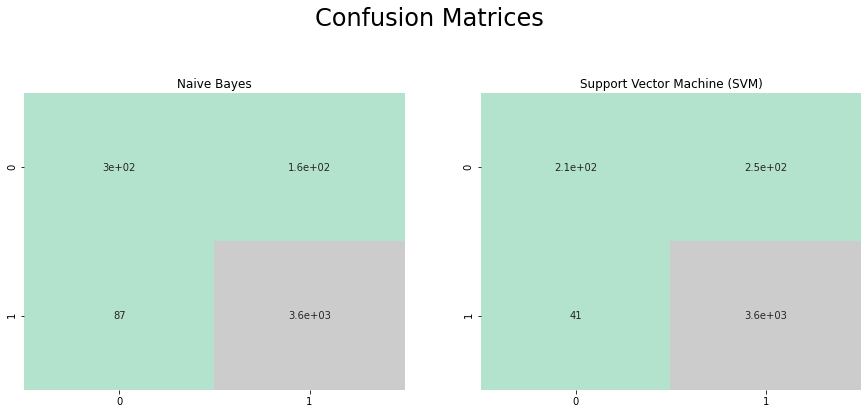

In [37]:
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(221)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="Pastel2",cbar=False);

plt.subplot(222)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Pastel2",cbar=False);

Precision - Recall - F1-Score

In [38]:
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))


 Naive Bayes
              precision    recall  f1-score   support

       False       0.77      0.65      0.71       458
        True       0.96      0.98      0.97      3665

    accuracy                           0.94      4123
   macro avg       0.87      0.81      0.84      4123
weighted avg       0.94      0.94      0.94      4123


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.84      0.46      0.59       458
        True       0.94      0.99      0.96      3665

    accuracy                           0.93      4123
   macro avg       0.89      0.72      0.78      4123
weighted avg       0.92      0.93      0.92      4123



### **See The Prediction**

Dataframe for the predictions using 

      df_predict

In [39]:
df_predict.sample(3)

,Clothing ID,Review Text,Sentiment,Naive Bayes,SVM
16969,984,"I love this jacket. the color is what drew me to it and it looks just like the picture. as far as sizing goes, i'm usually a medium but i ordered a small and it fit well. i feel that if i had ordered a medium it would look a little too puffy for my taste. the small gives me a more fitted look.",True,True,True
17007,820,"Absolutely stunning top! love! what a great buy on sale! i wear a medium/large and purchased the size 12...fits perfect! beware that the bottom has somewhat of a flair! the material is light so i would say this top is something to be worn transitioning between seasons, late summer to fall!",True,True,True
10379,1020,It's a beautiful skirt. the color is vivid and the skirt is flattering.,True,True,True


In [40]:
df_predict.sample(6)

,Clothing ID,Review Text,Sentiment,Naive Bayes,SVM
10617,1028,"I love the coh fleetwood jeans, and since i was looking for a pair of not-so-skinny skinny jeans, i thought these would be great. but unlike the fleetwoods, which are a substantial weight denim, these are very soft -- too soft -- and bag out in the first 5 minutes. the style is okay but the fabric makes them unflattering. maybe if you're looking for jeans you can lounge in, these will be for you because they do have the comfort equivalent of sweats.",False,True,True
14887,833,Love the look. love the fit for both professional and casual looks!!,True,True,True
18279,1033,"Loved these when i tried them on they fit well and were so flattering. i am a size 0/2 and 5' tall and have a 'bubble butt' and thicker thighs with a narrow waist i tried on a 24 they we a little tight on my bum and thighs but the waist was perfect, tried on a 25 and they were much more comfortable on my legs and worked on my waist as well. i thought all was good but after wearing them out for not even ten minutes they started slipping down constantly and loosed up around all areas especiall...",False,False,False
779,895,I bought this a month ago and returned it. but kept thinking about it so ordered it. it arrived on wed and i wore it on thursday as a dress with tights. i got so many compliments on it. it was perfect for the cool weather and was not too warm.\n\nthis knitter thinks the quality of the jacquard knit is excellent. yarn used is top notch.,True,True,True
4612,54,nan,True,True,True
3513,872,"This top caught my eye in store because of the fabric texture and light gray color. i wasn't too sure i'd like the cut on the bottom, but the neckline was so lovely i thought i'd try it out. i went with a small which is my usual (if not extra small) and loved it as soon as i put it on. the shape is very flattering, even with my post baby figure. i definitely think that it's better in person than in the photos online. and the price seems very good for a lovely sweater that's both classic and ...",True,True,True


In [41]:
df_predict.sample(9)

,Clothing ID,Review Text,Sentiment,Naive Bayes,SVM
17583,1110,"I bought this dress to wear to one of the upcoming events leading up to my wedding in mexico. it's the perfect mix of casual yet refined. as another reviewer mentioned, it is a bit tight through the bust, but luckily i wasn't blessed in that area. i would caution that there is absolutely no stretch to this dress. it's a true, straight shift. i'm going to rock it with turquoise and flats in mexico.",True,True,True
5377,1059,"Loved these in store when i tried them on but was in between sizes so i ordered them in the larger size. boy do i regret that! these stretch out so much i have to wear a belt with them and it gives me this saggy bunchy front when i sit...not attractive. wish i could return them, but i took the tag off and wore them not knowing this before hand!! if in between sizes definitely size down.",False,False,False
121,966,Great look and you can wear this vest with almost everything . i normally wear a small but they only had mediums and it fit fine( i like it tied). this will stay in my closet all year round . it does look like it will wrinkle easily but that doesn't bother me . a must buy !,True,True,True
8897,828,"I adore this top. it is super soft, drapes nicely, and looks great with a ton of different bottoms. i am 5'4"", 104 lbs., and ordered this in both xs (my usual size), and s. i ended up keeping the s (most cloth & stone xs tops swim on me, so i was a little surprised), but glad i tried both. my only concern is how it will hold up after washing it. it is a gauze-like material, and i just hope i can get a long life out if this top.",True,True,True
13717,862,"I tried on xs in the store (returned) and it looked huge on me, i like the rushing idea, the material is super soft, but overall, couldn't justify even at sale with 40% off, as it wasn't flattering when it looks big. blue color nice in person.",True,False,False
4167,857,"Love this! i am 5' 118 and the medium fits like a dress, not a tunic. i opted for the medium because i didn't want the fit to be tight. it is thin so you'll need a slip.",True,True,True
20796,1094,"If i had to describe on two words, that would be it. the material is not a stiff no-give material, nbut rahter a soft stretchy material, with some depth (the design has ""grooves"", not sure how to explain it#. if you are short, i would definitely go with petite though, it was a little too long on regular size and hit in the ""wrong"" spot on my calves. very flattering, and nice cut. i dind't order yet as it is new and i jsut bought a few dresses... but in my basket forh te next ""sale"" :) #if th...",True,True,True
6756,1033,"I'm so glad to own this one. i just tried it today and fully satisfied as always with pilcro. true to size, perfect color.\nhigh waisted and flare just right. can be paired with cropped top or peasant top. looking taller on this outfit!\nbest of all i got it on sale!",True,True,True
1490,936,"I wish i hadn't waited so long to buy this! the smalls were sold out in grey by the time i finially did, but the medium ended up being totally fine. perfect for a warmer winter, it is pretty thin so i wouldn't trust it on it's own to keep you warm in cold weather, but easily could be layered! i love the fun aspect of the tie front for this sweater as the front tuck is becoming a little tired in my eyes. i love that you can make it shorter or longer or even tuck it in because the ties aren't ...",True,True,True
